In [1]:
### V1, 02.01.2017, Celine ###
####### Reads and visualizes ply meshes and computes their sulcal shades. #######
####### using functions open_ply, normal and normals from r03ert0 (Github) #######
####### and create_fig from juhuntenburg (Github) #######

In [1]:
%pylab inline

import numpy
import pylab
import plot_surf_stat_map_3 as plot_surf
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Open mesh in ply format
def open_ply(filepath):
    f=open(filepath,'r');
    i=0;
    ip=0;
    it=0;
    np=0;
    nt=0;
    for str in f:
        i+=1;
        arr=str.split(" ");
        if(arr[0]=="element" and arr[1]=="vertex"):
            np=int(arr[2]);
            p=numpy.zeros((np,3));
        elif(arr[0]=="element" and arr[1]=="face"):
            nt=int(arr[2]);
            t=numpy.zeros((nt,3));
        elif(i>=11 and i<11+np):
            p[ip,0]=float(arr[0]);
            p[ip,1]=float(arr[1]);
            p[ip,2]=float(arr[2]);
            ip+=1;
        elif(i>=11+np and i<11+np+nt):
            t[it,0]=int(arr[1]);
            t[it,1]=int(arr[2]);
            t[it,2]=int(arr[3]);
            it+=1;
    mesh={};
    mesh["np"]=np;
    mesh["nt"]=nt;
    mesh["p"]=p;
    mesh["t"]=t;
    return mesh;

In [3]:
# Normal of triangle a,b,c
def normal(a,b,c):
    v=numpy.cross(b-a,c-a)
    n=v/numpy.linalg.norm(v)
    return n;

# Compute the normals for each vertex in mesh
def normals(mesh):
    np=mesh["np"];
    nt=mesh["nt"];
    p=mesh["p"];
    t=mesh["t"];
    n=numpy.zeros((np,3));
    for i in range(0,nt):
        nn=normal(p[t[i,0]],p[t[i,1]],p[t[i,2]]);
        n[t[i,0]]=numpy.add(n[t[i,0]],nn);
        n[t[i,1]]=numpy.add(n[t[i,1]],nn);
        n[t[i,2]]=numpy.add(n[t[i,2]],nn);
    for i in range(0,np):
        n[i]=n[i]/numpy.linalg.norm(n[i]);
    return n;

In [4]:
path = '/Users/ghfc/Desktop/Ferret_ExplDTI/P8_F10/endpoints/'
fmesh = path+'P8_F10_mesh.ply'
mesh = open_ply(fmesh)

In [5]:
np=mesh["np"];
nt=mesh["nt"];
p=mesh["p"];
t=mesh["t"];

In [6]:
n = []
n = normals(mesh)

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
# vector point of view for shades // ex: [1,0,0] light from the front of the brain (X orientation)
vect = [1,0,0]
# if dot(a,b)=0 then a and b orthogonals
sulc = dot(n, vect)

In [12]:
data_ = ones(np)

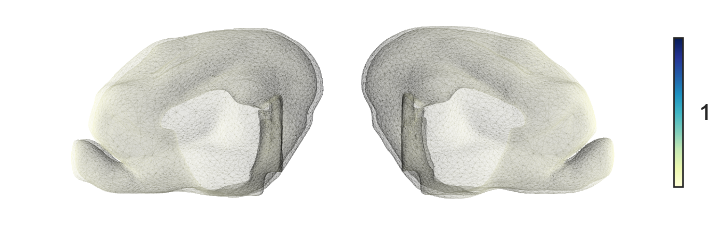

In [18]:
sns.set_context('poster')
sns.set_style("white")

plot_surf.create_fig( data=data_, coords=p, faces=t, azims=[0, 180], elevs=[0, 0], sulc=sulc, cmap='YlGnBu', cbar=True, alpha=0.1)
#plt.savefig(path+'P16_F21_sulc_fig.png')

plt.scatter(endpoints[0],endpoints[1])

In [10]:
##### Endpoints projection and visualization of the surface #####
                    # Work in progress #

In [14]:
path2 = '/Users/ghfc/Desktop/'

In [15]:
fendpoints = path2+'P8_F10_endpoints.txt'
endpoints = loadtxt(fendpoints)

In [44]:
len(endpoints)/10

99

In [40]:
def findClosestPoint(ep, mesh):
    
    np=mesh["np"];
    nt=mesh["nt"];
    p=mesh["p"];
    t=mesh["t"];
    
    n = normals(mesh)
    
    d = 1000000
    
    for i in range(np-1):
            v = ep - p[i]
            d1 = absolute(dot(v, n[i]))
            
            if d1 < d:
                d = d1
                cp = p[i]
                point = i
    #print point,d
    return point,d

In [46]:
ep = zeros((len(endpoints)/10,2))

for x in range((len(endpoints)/10)):

    ep[x] =findClosestPoint(endpoints[x],mesh)

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:
ep[0:10]

array([[  5.47000000e+02,   2.54485349e-03],
       [  7.20000000e+01,   1.61592577e-02],
       [  8.19000000e+02,   4.74943617e-03],
       [  1.96000000e+02,   1.42455683e-05],
       [  9.70000000e+02,   5.84492033e-03],
       [  1.62000000e+02,   8.67512015e-03],
       [  1.17900000e+03,   1.15885327e-03],
       [  9.26000000e+02,   4.02231496e-03],
       [  3.70000000e+01,   4.10105626e-02],
       [  3.73000000e+02,   1.26208051e-02]])

In [84]:
ep[:,1].max()

0.010136891929831249

In [47]:
ep.shape

(99, 2)

In [48]:
pep =[]

p0 =[]
p1 =[]
p2 =[]
p3 =[]
p4 =[]

maxi = ep[:,1].max()
mini = ep[:,1].min()

thr=5
step = (maxi-mini)/thr

for pp in range(len(ep)):
    if ep[pp,1]<mini+step and ep[pp,1]>=mini:
        p0.append(ep[pp,0])
    elif ep[pp,1]<mini+2*step and ep[pp,1]>=mini+step:
        p1.append(ep[pp,0])
    elif ep[pp,1]<mini+3*step and ep[pp,1]>=mini+2*step:
        p2.append(ep[pp,0])
    elif ep[pp,1]<mini+4*step and ep[pp,1]>=mini+3*step:
        p3.append(ep[pp,0])
    elif ep[pp,1]<=mini+5*step and ep[pp,1]>=mini+4*step:
        p4.append(ep[pp,0])
    

pep.append(p0)
pep.append(p1)
pep.append(p2)
pep.append(p3)
pep.append(p4)


In [37]:
pep

[[8675.0,
  4236.0,
  6411.0,
  1022.0,
  7462.0,
  9486.0,
  6385.0,
  10277.0,
  2393.0,
  3172.0,
  6485.0,
  6256.0,
  1694.0,
  9460.0,
  2934.0,
  8192.0,
  6737.0,
  1687.0,
  6677.0,
  2676.0,
  2678.0,
  5576.0,
  1014.0,
  5878.0,
  9556.0,
  7072.0,
  9959.0,
  5366.0,
  2383.0,
  3675.0,
  6788.0,
  5634.0,
  2398.0,
  9581.0,
  9283.0,
  7839.0,
  8271.0,
  8472.0,
  6933.0,
  4240.0,
  2401.0,
  1019.0,
  8671.0,
  9225.0,
  798.0,
  1919.0,
  9615.0,
  10065.0,
  9701.0,
  8412.0,
  9219.0,
  9670.0,
  1685.0,
  10333.0,
  8947.0,
  779.0,
  6192.0,
  9536.0,
  10102.0,
  7221.0,
  5637.0,
  5334.0,
  5432.0,
  2104.0,
  4024.0,
  2408.0,
  9582.0,
  8911.0,
  6706.0,
  2652.0,
  6692.0,
  9373.0,
  8692.0,
  8047.0,
  4480.0,
  812.0,
  5810.0,
  9033.0,
  2178.0,
  1030.0,
  6787.0,
  4709.0,
  7990.0,
  9589.0,
  1204.0,
  9795.0,
  2128.0,
  3729.0,
  4923.0,
  7221.0,
  7207.0,
  592.0,
  10075.0,
  7017.0,
  9016.0,
  7228.0,
  9586.0,
  6967.0,
  5014.0,
  5806.0,

In [14]:
for i in ep:
    data_[i] = 100

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [16]:
sns.set_context('poster')
sns.set_style("white")

plot_surf.create_fig( coords=p, faces=t, labels=ep, azims=[0, 180], elevs=[270, 0], sulc=sulc, cpal='hls')
#plt.savefig(path+'P16_F21_sulc_fig.png')

plt.scatter(endpoints[0],endpoints[1])

NameError: name 'ep' is not defined

In [50]:
p[:,0]

array([  9.37835,   8.7263 ,   8.0581 , ...,   9.91751,  10.4326 ,  11.1608 ])